# k_means algorithm


* randomly select the centroids
* from each data point calculate distance to the centroid
# distance metrics : we have 4 they are


1.HAMMING DISTANCE
2.EUCLIDEAN DISTANCE
3.MANHATTEN DISTANCE
4.MINKOWSKI DISTANCE



In [1]:
import pandas as pd
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import glob                         # it defines the variable kind of things

In [2]:
df=pd.read_csv(r"C:\Users\harid\OneDrive\Desktop\python\data\datasets\AB_NYC_2019.csv")

In [3]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.shape

(48895, 16)

In [6]:
df.info()              # description about the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# pre processing

memory management

In [7]:
"""    iterate through all the columns of a dataframe and modify the datatypes to 
         reduce memory usage"""


start_mem=df.memory_usage().sum()/1024**2
print (" memory usage of dataframe is {:.2f}MB".format(start_mem))

 memory usage of dataframe is 5.97MB


In [8]:
"""    iterate through all the columns of a dataframe and modify the datatypes to 
         reduce memory usage"""


start_mem=df.memory_usage().sum()/1024**2
print (" memory usage of dataframe is {:.2f}MB".format(start_mem))

for col in df.columns:
    col_type=df[col].dtype
    
    
    if col_type !=object:
        c_min=df[col].min()
        c_max=df[col].max()
        if str(col_type)[:3]=="int":
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col]=df[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df[col]=df[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col]=df[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col]=df[col].astype(np.int64)
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                df[col]=df[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col]=df[col].astype(np.float32)
            else:
                df[col]=df[col].astype(np.float64)
    else:
        df[col]=df[col].astype("category")
end_mem=df.memory_usage().sum()/1024**2
print(" memory usage after optimization is : {:.2f} MB ".format (end_mem))
print("decreased by {:.1f}%".format (100 *(start_mem - end_mem)/start_mem))

 memory usage of dataframe is 5.97MB
 memory usage after optimization is : 3.80 MB 
decreased by 36.4%


In [9]:
df.dtypes

id                                   int32
name                              category
host_id                              int32
host_name                         category
neighbourhood_group               category
neighbourhood                     category
latitude                           float16
longitude                          float16
room_type                         category
price                                int16
minimum_nights                       int16
number_of_reviews                    int16
last_review                       category
reviews_per_month                  float16
calculated_host_listings_count       int16
availability_365                     int16
dtype: object

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65625,-74.0000,Private room,149,1,9,2018-10-19,0.209961,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75000,-74.0000,Entire home/apt,225,1,45,2019-05-21,0.379883,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81250,-73.9375,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68750,-73.9375,Entire home/apt,89,1,270,2019-07-05,4.640625,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.81250,-73.9375,Entire home/apt,80,10,9,2018-11-19,0.099976,1,0


In [11]:
c_min=df["price"].min()
c_max=df["price"].max()
print(c_min,c_max)

0 10000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  int32   
 1   name                            48879 non-null  category
 2   host_id                         48895 non-null  int32   
 3   host_name                       48874 non-null  category
 4   neighbourhood_group             48895 non-null  category
 5   neighbourhood                   48895 non-null  category
 6   latitude                        48895 non-null  float16 
 7   longitude                       48895 non-null  float16 
 8   room_type                       48895 non-null  category
 9   price                           48895 non-null  int16   
 10  minimum_nights                  48895 non-null  int16   
 11  number_of_reviews               48895 non-null  int16   
 12  last_review       

In [13]:
base_df=df.groupby("id").sum()[["host_id","price"]]

In [14]:
base_df.head(2)

,host_id,price
id,,
2539,2787,149
2595,2845,225


In [15]:
base_df.shape

(48895, 2)

In [16]:
df.shape

(48895, 16)

In [17]:
df[df["price"]==149]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65625,-74.0000,Private room,149,1,9,2018-10-19,0.209961,6,365
531,193853,Quiet Chelsea Studio w/Charm,48599,Anastasia,Manhattan,Chelsea,40.75000,-74.0000,Entire home/apt,149,6,23,2018-05-21,0.270020,2,0
540,197155,Quiet Jr Alcove Near Times Square!,960836,Vlad,Manhattan,Hell's Kitchen,40.75000,-74.0000,Entire home/apt,149,1,122,2019-06-23,1.290039,1,20
865,310220,Prime location! Backyard & outdoor shower! Uni...,1590548,Magdalena,Brooklyn,Greenpoint,40.71875,-73.9375,Private room,149,14,65,2018-12-30,0.729980,1,364
1364,599847,Beautiful Ft. Greene Apartment-NEW!,2966937,Chris,Brooklyn,Clinton Hill,40.68750,-73.9375,Entire home/apt,149,2,20,2018-12-30,0.239990,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47132,35606417,Modern 2 Bed! Easy Access to Manhattan!,267875219,Ridge,Queens,Ridgewood,40.71875,-73.8750,Entire home/apt,149,3,0,NaN,NaN,1,169
47422,35720262,Best manhattan view and 5 min into manhattan,265422938,泽宇,Queens,Long Island City,40.75000,-73.9375,Private room,149,2,0,NaN,NaN,2,23
47974,36018376,Beautiful Rooftop Home -Upper East Side -,39021367,Christelle,Manhattan,Upper East Side,40.78125,-73.9375,Entire home/apt,149,6,0,NaN,NaN,1,82
48021,36038070,✨Superb Room- 2 Queen Beds ✨,270874051,Hotel Vetiver,Queens,Long Island City,40.75000,-73.9375,Private room,149,1,0,NaN,NaN,8,316


#                null value treatment

In [18]:
base_df.isna().sum()

host_id    0
price      0
dtype: int64

In [19]:
base_df.columns

Index(['host_id', 'price'], dtype='object')

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 8 Text major ticklabel objects>)

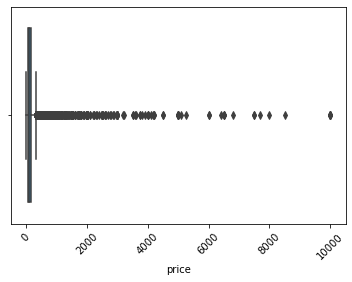

In [20]:
import seaborn as sbn
sbn.boxplot(base_df["price"])
plt.xticks(rotation=45)

# boxplot:
*            it helps to check, is there any outliers in the given data






* outliers are of 2 types. they are:


* 1. lower outlier
* 2. upper outlier

In [21]:
iqr=base_df["price"].quantile(0.75)-base_df["price"].quantile(0.25)
iqr

106.0

In [22]:
lo=base_df["price"].quantile(0.25)-1.5*iqr
uo=base_df["price"].quantile(0.75)+1.5*iqr

print(lo,uo)

-90.0 334.0


In [23]:
print("min value",base_df["price"].min())
print("max value",base_df["price"].max())

min value 0
max value 10000


In [24]:
# if u want to appl clustering algorithm data noralization is really impoeratnt to us 

# if u want to appy the ml data points must have the same units

# min max scalar:


* converts all data points ranges from 0 to 1 
# formula:



*     x-min(x)%max(x)-min(x)

In [25]:
# from sklearn.preprocessing import label encoder 
# lb=LabelEncoder()
# base_df=pd.DataFrame (lb.fit_transform(base_df)columns=base_df.columns)

In [26]:
# min max scalar


from sklearn.preprocessing import MinMaxScaler


mn=MinMaxScaler()
mn.fit(base_df)
x=mn.transform(base_df)
data1=pd.DataFrame(x)
data1.columns=base_df.columns
base_df=data1

In [27]:
base_df.head(2)

,host_id,price
0,0.000001,0.0149
1,0.000001,0.0225


In [28]:
# min max scalar
                             # EASIER WAY TO FIND MIN MAX SCALAR

from sklearn.preprocessing import MinMaxScaler


mn=MinMaxScaler()
pd.DataFrame(mn.fit_transform(base_df),columns=base_df.columns)

,host_id,price
0,0.000001,0.0149
1,0.000001,0.0225
2,0.000008,0.0150
3,0.000009,0.0089
4,0.000017,0.0080
...,...,...
48890,0.030002,0.0070
48891,0.023944,0.0040
48892,0.085632,0.0115
48893,0.112946,0.0055


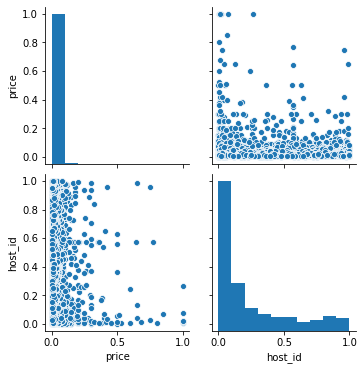

In [29]:
sbn.pairplot(base_df[["price","host_id"]])

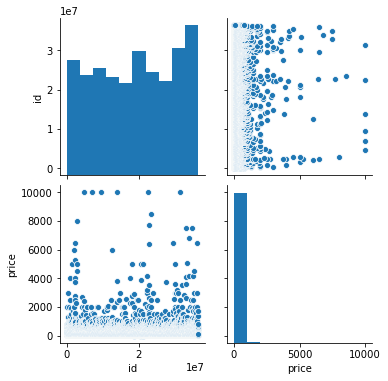

In [30]:
sbn.pairplot(df[["id","price"]])

#  MODEL BUILDING


* IDENTIFYING THE RIGHT NUMBER OF CLUSTERS

In [31]:
from sklearn.cluster import KMeans  

km=KMeans()
km.fit(base_df)
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [32]:
from sklearn.cluster import KMeans  

km=KMeans(verbose=1)
km.fit(base_df)
km.get_params()

Initialization complete
Iteration 0, inertia 80.15315686846368
Iteration 1, inertia 74.29116505915887
Iteration 2, inertia 74.04797451842241
Iteration 3, inertia 73.9028053730497
Iteration 4, inertia 73.70152772958721
Iteration 5, inertia 73.52619804327108
Iteration 6, inertia 73.32999991931037
Iteration 7, inertia 73.16283609943902
Iteration 8, inertia 73.00712370500125
Iteration 9, inertia 72.8718345947657
Iteration 10, inertia 72.79382011683217
Iteration 11, inertia 72.75068645730012
Iteration 12, inertia 72.7221063583898
Converged at iteration 12: center shift 3.0179952718736967e-06 within tolerance 4.134808745215681e-06
Initialization complete
Iteration 0, inertia 95.79560077617307
Iteration 1, inertia 80.95859478673346
Iteration 2, inertia 77.96872223823905
Iteration 3, inertia 76.64303396069002
Iteration 4, inertia 76.13331629244654
Iteration 5, inertia 75.84608887598559
Iteration 6, inertia 75.66491405758119
Iteration 7, inertia 75.52069766339173
Iteration 8, inertia 75.3651637

Iteration 21, inertia 80.72144604404372
Iteration 22, inertia 80.11875724692074
Iteration 23, inertia 79.51328658415848
Iteration 24, inertia 78.996026320711
Iteration 25, inertia 78.423371026818
Iteration 26, inertia 77.92887465523648
Iteration 27, inertia 77.54316219432731
Iteration 28, inertia 77.32729497456805
Iteration 29, inertia 77.18481338525017
Iteration 30, inertia 77.08871444939035
Iteration 31, inertia 77.02719848969429
Iteration 32, inertia 76.97568140355143
Iteration 33, inertia 76.90899637249622
Iteration 34, inertia 76.85075483216144
Iteration 35, inertia 76.80680546027305
Iteration 36, inertia 76.77142585643641
Converged at iteration 36: center shift 2.238210827635107e-06 within tolerance 4.134808745215681e-06


{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 1}

In [33]:
from sklearn.cluster import KMeans  

km=KMeans(n_clusters=3)
km.fit(base_df)
km.get_params()
print(km.inertia_)

354.22737509002167


In [34]:
from sklearn.cluster import KMeans  

km=KMeans(n_clusters=5)
km.fit(base_df)
km.get_params()
print(km.inertia_)

147.20807561111556


In [35]:
# using the elbow method to find the optimal number of clusters


import matplotlib.pyplot as plt          

def kelbow(df,k):
    from sklearn.cluster import KMeans               # k values : user need to specify the number of clusters
                                                    # we need to take optimal number of clusters into consideration
    x=[]
    for i in range(1,k):
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(df)
        x.append(kmeans.inertia_)
    plt.plot(range(1,k),x)
    plt.title(" the elbow method")
    plt.xlabel(" number of clusters")
    plt.ylabel(" wcss")

#                    clustering

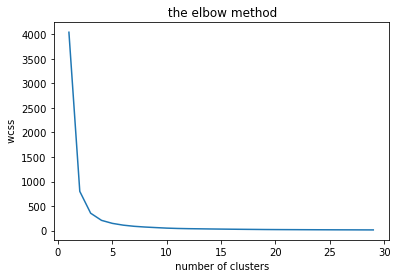

In [36]:
kelbow(base_df[["price","host_id"]],30)   # where ever curve bending called as optimal value of cluster

In [37]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
km.fit(base_df[["price","host_id"]])
len(km.predict(base_df[["price","host_id"]]))

48895

In [38]:
base_df.shape

(48895, 2)

In [39]:
base_df.head()

,host_id,price
0,0.000001,0.0149
1,0.000001,0.0225
2,0.000008,0.0150
3,0.000009,0.0089
4,0.000017,0.0080


In [40]:
"""  based on disatnce it flags the data (rows) with clusters(k)"""

km.predict(base_df[["price","host_id"]])

array([0, 0, 0, ..., 0, 3, 3])

In [41]:
base_df["clusters"]=km.predict(base_df[["price","host_id"]])

In [42]:
base_df.head()

,host_id,price,clusters
0,0.000001,0.0149,0
1,0.000001,0.0225,0
2,0.000008,0.0150,0
3,0.000009,0.0089,0
4,0.000017,0.0080,0


In [43]:
import researchpy as rp

In [44]:
rp.summary_cat(base_df["price"])

,Variable,Outcome,Count,Percent
0,price,0.0100,2051,4.19
1,,0.0150,2047,4.19
2,,0.0050,1534,3.14
3,,0.0060,1458,2.98
4,,0.0200,1401,2.87
...,...,...,...,...
669,,0.3900,1,0.00
670,,0.0561,1,0.00
671,,0.1075,1,0.00
672,,0.1020,1,0.00


In [45]:
"""   Grouping all data(rows) with flag2 into base_df_c1"""
base_df_c1=base_df[base_df["price"]==2]

In [46]:
base_df_c1["price"].mean()


""" calculate the mean of price variable"""

' calculate the mean of price variable'

In [47]:
base_df_c1.shape

(0, 3)

In [48]:
"""   comparing each value of price column belonging to cluster1 with mean value of cluster1 
       filtering the rows which are less than mean i.e of of ...  are less than mean value """


base_df_c1[base_df_c1["price"]<base_df_c1["price"].mean()]["host_id"].values.shape

(0,)

In [49]:
"""   here we are grouping the dataset based on clusters and finding the descriptive statistics for each column """


pd.DataFrame(base_df.groupby("clusters").describe().T)

clusters                  0            1            2            3  \
host_id count  24485.000000  4013.000000  5373.000000  9864.000000   
        mean       0.037973     0.635450     0.410618     0.187137   
        std        0.032099     0.069442     0.063837     0.051421   
        min        0.000000     0.523978     0.300017     0.112781   
        25%        0.010092     0.574073     0.356705     0.144128   
        50%        0.028545     0.631486     0.401707     0.178404   
        75%        0.062149     0.697681     0.468606     0.225433   
        max        0.112757     0.756113     0.524185     0.299672   
price   count  24485.000000  4013.000000  5373.000000  9864.000000   
        mean       0.015616     0.015859     0.014254     0.013793   
        std        0.025733     0.029565     0.017459     0.020248   
        min        0.000000     0.001000     0.000000     0.001000   
        25%        0.007500     0.006000     0.006000     0.006500   
        50%        0.011500     0.009600     0.009900     0.010000   
        75%        0.018000     0.016500     0.017000     0.015500   
        max        1.000000     0.770300     0.500000     1.000000   

clusters                 4  
host_id count  5160.000000  
        mean      0.876021  
        std       0.071700  
        min       0.756495  
        25%       0.807886  
        50%       0.870267  
        75%       0.945705  
        max       1.000000  
price   count  5160.000000  
        mean      0.017070  
        std       0.023089  
        min       0.001000  
        25%       0.006500  
        50%       0.011500  
        75%       0.020500  
        max       0.750000

In [50]:
# how do u validate whether ur cluster perforing well or not 

"""   Entropy is b/w 0 to 1. if the value is less than 0.5 its a good cluster if it is one
         its a bad cluster 
    Entropy is for getting accuracy score. entropy is based on probability calculation.
    
    entropy is  a homogeneous mixture as ur entropy value is 0.1 its a good cluster 
    
    
    in the same way cal the entropy for all the cluster with price and host_id and take the avg as the score """



import math
total_entropy=[]
for i in base_df[base_df["clusters"]==3]["price"]:
    num=list(base_df[base_df["clusters"]==3]["price"].values).count(i)
    den=base_df[base_df["clusters"]==3]["price"].shape[0]
    total_entropy.append(((num/den)*(1/math.log(num/den,2))))
    

    
total_entropy=np.array(total_entropy).sum()

total_entropy=-(total_entropy)

print(total_entropy)

32.17953494874104


In [51]:
base_df["clusters"].value_counts()

0    24485
3     9864
2     5373
4     5160
1     4013
Name: clusters, dtype: int64

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

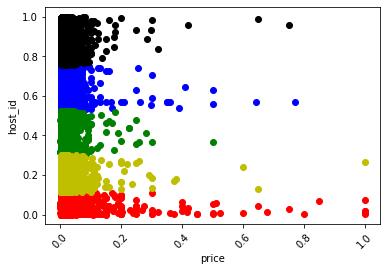

In [52]:
plt.scatter(base_df[base_df["clusters"]==0]["price"],base_df[base_df["clusters"]==0]["host_id"],color="r")
plt.scatter(base_df[base_df["clusters"]==1]["price"],base_df[base_df["clusters"]==1]["host_id"],color="b")
plt.scatter(base_df[base_df["clusters"]==2]["price"],base_df[base_df["clusters"]==2]["host_id"],color="g")
plt.scatter(base_df[base_df["clusters"]==3]["price"],base_df[base_df["clusters"]==3]["host_id"],color="y")
plt.scatter(base_df[base_df["clusters"]==4]["price"],base_df[base_df["clusters"]==4]["host_id"],color="k")
plt.xlabel("price")
plt.ylabel("host_id")
plt.xticks(rotation=45)

In [53]:
base_df["index"]=base_df.index+1

In [54]:
base_df.head()

,host_id,price,clusters,index
0,0.000001,0.0149,0,1
1,0.000001,0.0225,0,2
2,0.000008,0.0150,0,3
3,0.000009,0.0089,0,4
4,0.000017,0.0080,0,5


In [55]:
base_df["index"]=base_df["index"].astype(np.int8)

In [56]:
df.dtypes

id                                   int32
name                              category
host_id                              int32
host_name                         category
neighbourhood_group               category
neighbourhood                     category
latitude                           float16
longitude                          float16
room_type                         category
price                                int16
minimum_nights                       int16
number_of_reviews                    int16
last_review                       category
reviews_per_month                  float16
calculated_host_listings_count       int16
availability_365                     int16
dtype: object

In [57]:
df1=pd.merge(df,base_df[["clusters","index"]],left_on="price",right_on="index",how="left")

In [58]:
df1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,index
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65625,-74.0000,Private room,149,1,9,2018-10-19,0.209961,6,365,NaN,NaN
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75000,-74.0000,Entire home/apt,225,1,45,2019-05-21,0.379883,2,355,NaN,NaN
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81250,-73.9375,Private room,150,3,0,NaN,NaN,1,365,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68750,-73.9375,Entire home/apt,89,1,270,2019-07-05,4.640625,1,194,0.0,89.0
4,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68750,-73.9375,Entire home/apt,89,1,270,2019-07-05,4.640625,1,194,0.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525629,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.75000,-74.0000,Private room,90,7,0,NaN,NaN,1,23,4.0,90.0
5525630,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.75000,-74.0000,Private room,90,7,0,NaN,NaN,1,23,4.0,90.0
5525631,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.75000,-74.0000,Private room,90,7,0,NaN,NaN,1,23,3.0,90.0
5525632,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.75000,-74.0000,Private room,90,7,0,NaN,NaN,1,23,4.0,90.0


In [59]:
df1.shape

(5525634, 18)

In [60]:
df2=df1.drop_duplicates()

In [61]:
df2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,index
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65625,-74.0000,Private room,149,1,9,2018-10-19,0.209961,6,365,NaN,NaN
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75000,-74.0000,Entire home/apt,225,1,45,2019-05-21,0.379883,2,355,NaN,NaN
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81250,-73.9375,Private room,150,3,0,NaN,NaN,1,365,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68750,-73.9375,Entire home/apt,89,1,270,2019-07-05,4.640625,1,194,0.0,89.0
39,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68750,-73.9375,Entire home/apt,89,1,270,2019-07-05,4.640625,1,194,3.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525443,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.75000,-74.0000,Private room,90,7,0,NaN,NaN,1,23,0.0,90.0
5525475,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.75000,-74.0000,Private room,90,7,0,NaN,NaN,1,23,3.0,90.0
5525520,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.75000,-74.0000,Private room,90,7,0,NaN,NaN,1,23,2.0,90.0
5525545,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.75000,-74.0000,Private room,90,7,0,NaN,NaN,1,23,1.0,90.0


In [62]:
df2.shape

(164195, 18)